# Income Spent Clustiring Using Hierarchical

# Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\hierarchy.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preparation

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score'], dtype='object')

In [10]:
df=df.drop(['CustomerID'],axis=1)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
labling=LabelEncoder()

In [15]:
df.Gender=labling.fit_transform(df.Gender)
df.head()

,Gender,Age,Annual Income (k$),Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              200 non-null    int64
 1   Age                 200 non-null    int64
 2   Annual Income (k$)  200 non-null    int64
 3   Spending Score      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [28]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# Dendrogram Visualisation 

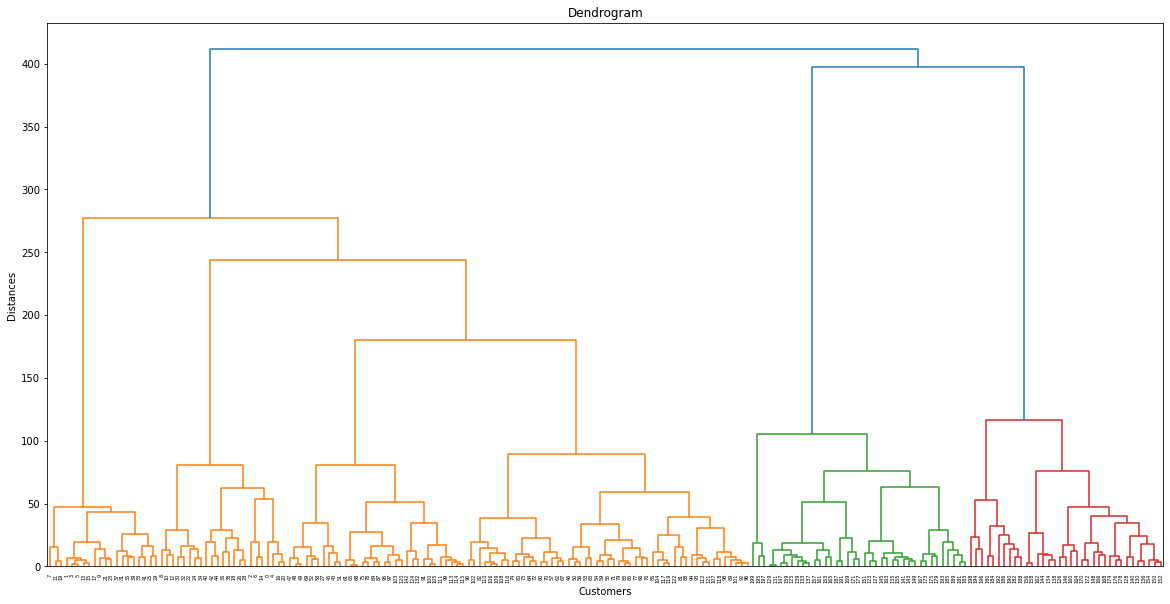

In [21]:
import scipy.cluster.hierarchy as clus
plt.figure(figsize=(20,10))
dendrogram=clus.dendrogram(clus.linkage(df,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distances")
plt.show()


# Fitting Hierarchical Clustering with N=5 Cluster Size

In [25]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
y_means=model.fit_predict(df)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# Visualise The Clusters

Cluster 1:Costomer with medium Income and medium Spending

Cluster 2:Costomer with High Income and High Spending

Cluster 3:Costomer with Low Income and Low Spending

Cluster 4:Costomer with High Income and Low Spending

Cluster 5:Costomer with Low Income and High Spending


In [32]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


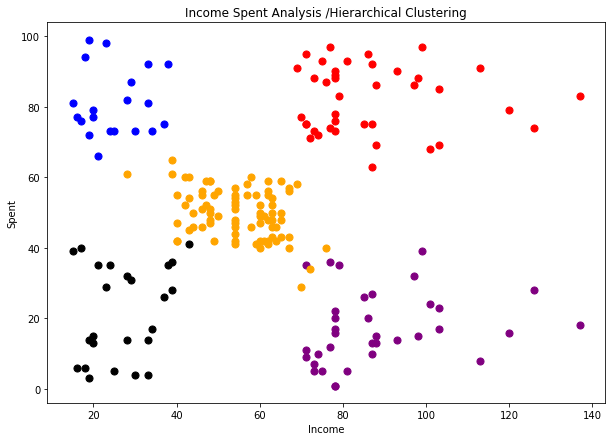

In [38]:
X=df.iloc[:,[2,3]].values
plt.figure(figsize=(10,7))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c='purple',label='Cluster 1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c='orange',label='Cluster 2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c='red',label='Cluster 3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50,c='black',label='Cluster 5')
plt.title("Income Spent Analysis /Hierarchical Clustering")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.show()


